In [ ]:
# setting things up for transferring a dataset from kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [8]:
# '!': ye khud likhna hay
# 'kaggle competitions download -c dogs-vs-cats': ye kaggle k dataset k page par, vaheen say milay ga

!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:07<00:00, 290MB/s]
100% 812M/812M [00:07<00:00, 113MB/s]


In [9]:
# saari ki saari zipped files, jahan jahan bhi pri hain unzip ho jayain gi
# bhtar hay k is k bad, zipped folders del kr do

!unzip \*.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [10]:
# already unzipped del kr dena yad say
# ab agar zip k andar say kuch new zipped data niklay to is liye dobara chlai
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          
  inflating: test1/5521.jpg          

In [15]:
# is saray process ki details notebook #2 main daikh lo

import os, shutil

In [11]:
original_dataset_dir  =  '/content/train'

base_dir              =  '/content/cats n dogs'

os.mkdir(base_dir)


In [12]:
train_dir                 =    os.path.join(base_dir, 'train')
os.mkdir(train_dir)


validation_dir            =    os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


test_dir                  =    os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [13]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)



validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)



test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [16]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(validation_cats_dir,  fname)
    shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


In [17]:
# Copies the first 1,000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)




# Copies the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)




# Copies the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src  =  os.path.join(original_dataset_dir, fname)
    dst  =  os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [18]:
print('total training cat images:'   , len(os.listdir(train_cats_dir)))
print('total training dog images:'   , len(os.listdir(train_dogs_dir)))
print('total validation cat images:' , len(os.listdir(validation_cats_dir)))
print('total validation dog images:' , len(os.listdir(validation_dogs_dir)))
print('total test cat images:'       , len(os.listdir(test_cats_dir)))
print('total test dog images:'       , len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## FEATURE EXTRACTION WITH DATA AUGMENTATION

Because models behave just like layers, you can add a model (like conv_base) to a
Sequential model just like you would add a layer

In [19]:
# see notebook 3 for details of this cell

from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights      =  'imagenet',
                  include_top  =  False,
                  input_shape  =  (150, 150, 3))


58889256/58889256 [==============================] - 0s 0us/step


#### Listing 5.20: Adding a densely connected classifier on top of the convolutional base

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(conv_base)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [21]:
 model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### Freezing a Base

 Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.

In Keras, you freeze a network by setting its trainable attribute to False:

In [22]:
# isay sir further smjhayain gay, k trainable weights say EXACTLY kia murad hay

print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))




This is the number of trainable weights before freezing the conv base: 30


In [23]:
 # freezing

 conv_base.trainable = False


In [24]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights after freezing the conv base: 4


With this setup, only the weights from the two Dense layers that you added will be
trained. That’s a total of four weight tensors: two per layer (the main weight matrix
and the bias vector)

### Note that in order for these changes to take effect, you must first compile the model. If you ever modify weight trainability after compilation, you should then recompile the model, or these changes will be ignored.

### Listing 5.21: Training the model end to end with a frozen convolutional base

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


train_datagen = ImageDataGenerator(
                  rescale             =  1./255,
                  rotation_range      =  40,
                  width_shift_range   =  0.2,
                  height_shift_range  =  0.2,
                  shear_range         =  0.2,
                  zoom_range          =  0.2,
                  horizontal_flip     =  True,
                  fill_mode           =  'nearest')


test_datagen = ImageDataGenerator(rescale=1./255)  # this object will be used to generate both, the validation_data as-well-as test_data



train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size  =  (150, 150),
                    batch_size   =  20,
                    class_mode   =  'binary')



validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size  =  (150, 150),
                        batch_size   =  20,
                        class_mode   =  'binary')




model.compile(loss         =  'binary_crossentropy',
                optimizer  =  optimizers.RMSprop(learning_rate=2e-5),
                metrics    =  ['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
# generator isay 20,20 k batches ki shakal main, inputs bhi day ga and labels bhi
history           =  model.fit(train_generator,
                                steps_per_epoch   =  100,
                                epochs            =  30,
                                validation_data   =  validation_generator,
                                validation_steps  =  50)


Epoch 1/30
100/100 [==============================] - 33s 227ms/step - loss: 0.5927 - acc: 0.7035 - val_loss: 0.4646 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 23s 226ms/step - loss: 0.4813 - acc: 0.7860 - val_loss: 0.3722 - val_acc: 0.8640
Epoch 3/30
100/100 [==============================] - 21s 210ms/step - loss: 0.4339 - acc: 0.8100 - val_loss: 0.3345 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 22s 220ms/step - loss: 0.4086 - acc: 0.8160 - val_loss: 0.3088 - val_acc: 0.8830
Epoch 5/30
100/100 [==============================] - 23s 227ms/step - loss: 0.3903 - acc: 0.8220 - val_loss: 0.2959 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 21s 209ms/step - loss: 0.3787 - acc: 0.8400 - val_loss: 0.2851 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 22s 220ms/step - loss: 0.3657 - acc: 0.8430 - val_loss: 0.2772 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 2

### Listing 5.19: Plotting the results

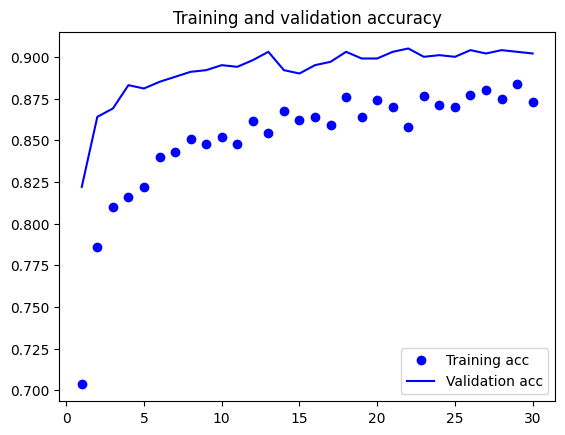

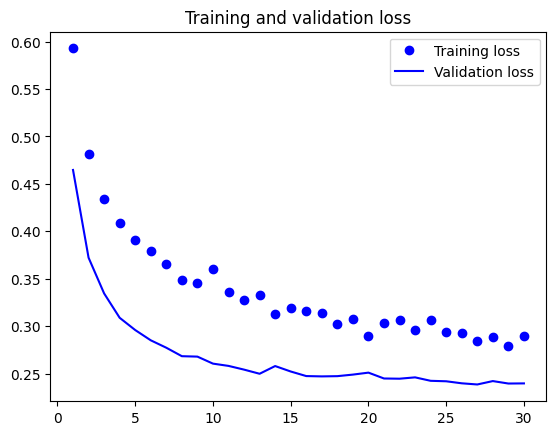

In [27]:
import matplotlib.pyplot as plt

acc      =  history.history['acc']
val_acc  =  history.history['val_acc']
loss     =  history.history['loss']
val_loss =  history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc    , 'bo',  label = 'Training acc')
plt.plot(epochs, val_acc, 'b' ,  label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss    , 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [99]:
test_generator = test_datagen.flow_from_directory(
                        test_dir,
                        target_size  =  (150, 150),
                        batch_size   =  20,
                        class_mode   =  None)


Found 1000 images belonging to 2 classes.


In [100]:
predictions = model.predict( test_generator  )


50/50 [==============================] - 4s 71ms/step


In [101]:
len( predictions )

1000

In [102]:
predictions.shape

(1000, 1)

In [103]:
print(predictions[4])

print(predictions[5])

[0.12968472]
[0.93971634]


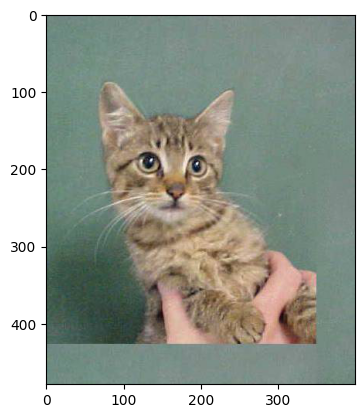

In [104]:
from tensorflow.keras.preprocessing import image


img_path     =  '/content/cats n dogs/test/cats/cat.1502.jpg'
my_img       =  image.load_img(img_path)

imgplot = plt.imshow( my_img )

plt.show()


In [91]:
# import numpy as np

# def extract_features(directory, sample_count):

#     pics    =  np.zeros(shape=(sample_count, 150, 150, 3))

#     labels  =  np.zeros(shape=(sample_count) )


#     i=0
#     for pics_batch, labels_batch in test_generator:

#         pics[  i*batch_size : (i+1)*batch_size]  =  pics_batch

#         labels[i*batch_size : (i+1)*batch_size]  =  labels_batch

#         i += 1

#         if i * batch_size >= sample_count:
#             break
#     return pics, labels


In [95]:
# pics_t, labels_t = extract_features('/content/cats n dogs/test/cats', 500)


In [105]:
# labels_t[0:40]

In [106]:
# predictions[0:40]